## Regression exercise
#### ## Welcome in the part 1!!

We are going to work with randomly generalize data and trying to fit different polynomial regressions to it and explore how our loss function behaves. We will use the formulas we introduced in theoretical sections and we will create linear regression model from scratch.

In [97]:
from pandas import DataFrame
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

#### Task 1

Write a function psi(x,m) defined as $\psi(x)=[1, x, x ^2, ..., x^m]$

In [98]:
def psi(x,m):
    psi_x = []
    for i in range(m+1):
        psi_x.append(x**i)
    return(psi_x)

In [99]:
ps = psi(2,3)
ps

[1, 2, 4, 8]

#### Task 2

Write a function $h(x,\alpha)$ defined as $h(x,\alpha)=\alpha^T\psi(x)$

In [100]:
def h(x,alpha):
    a = np.array(alpha)
    return(a.T.dot(x))

In [101]:
alpha = [2,4,6,8]

In [102]:
h(ps,alpha)

98

#### Task 3
Create a random 3rd order polynomial (we call it p3)

In [103]:
def p3(x):
    return (x + x**2 + x**3)

#### Task 4
Choose an interval [a,b], on which the polynomial is S-shaped.

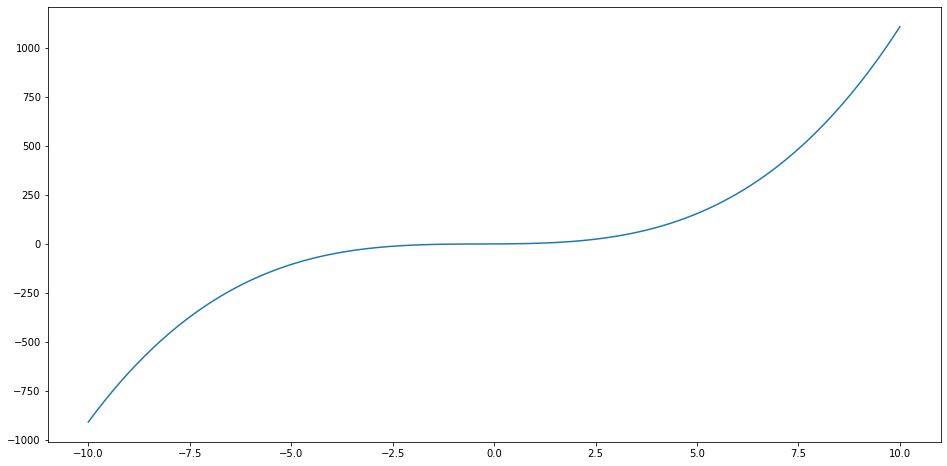

In [104]:
fig, ax = plt.subplots(figsize=(16,8))
x = np.linspace(-10,10,100)
ax.plot(x,p3(x))

#### Task 5
Sample 30 random values in [a,b] and stored them in `xs`.

In [105]:
xs = np.random.uniform(-10, 10, 30)
xs

array([-6.15442014, -4.4670291 , -5.31493023, -2.59555016, -8.42523041,
       -1.53668028,  8.76734876,  7.62735119,  8.19183127, -3.52510202,
       -4.85720035, -4.04950227,  0.70643456, -7.04591856, -8.97417821,
        1.94098874,  1.09956623, -9.40502367,  6.05890368,  5.09858344,
       -8.70034527, -5.98799459, -7.37858134,  3.64740731, -9.53313272,
        4.60013791, -5.57521476, -4.03522369, -7.62741373,  4.64391246])

#### Task 6
For each x in xs, compute p3(x) and store them as `ys`.

In [106]:
ys = p3(xs)
ys.shape

(30,)

#### Task 7:
Plot `ys` against `xs` on [a,b]. Does it look like a third order polynomial?

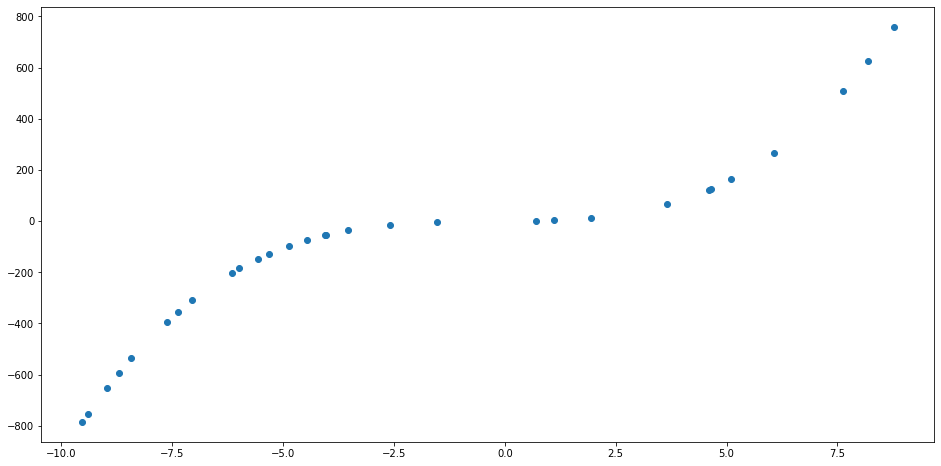

In [107]:
fig, ax = plt.subplots(figsize=(16,8))
x = np.linspace(-10,10,100)
ax.scatter(xs,ys)

## Fitting the data

We will try to fit the data by a polynomial of order m=2. 

#### Task 8:

Using xs and psi, create the matrix X defined as 

<img src="matrixX.png">

In [136]:
def psi(x,m):
    psi_x = []
    for i in range(m+1):
        psi_x.append(x**i)
    return(psi_x)

In [137]:
X_arrays = psi(xs,2)

In [138]:
row1 = pd.Series(X_arrays[0])
row2 = pd.Series(X_arrays[1])
row3 = pd.Series(X_arrays[2])

In [139]:
X_mat = pd.concat([row1, row2, row3], axis = 1).T
X_mat

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,-6.154420,-4.467029,-5.314930,-2.595550,-8.425230,-1.536680,8.767349,7.627351,8.191831,-3.525102,...,-8.700345,-5.987995,-7.378581,3.647407,-9.533133,4.600138,-5.575215,-4.035224,-7.627414,4.643912
2,37.876887,19.954349,28.248483,6.736881,70.984507,2.361386,76.866404,58.176486,67.106100,12.426344,...,75.696008,35.856079,54.443463,13.303580,90.880620,21.161269,31.083020,16.283030,58.177440,21.565923


#### Task 9
Compute the optimal $\alpha$ using the expression $\alpha = (XX^T)^+Xy$ where $(XX^T)^+$ is the pseudoinverse matrix. y is our `ys` from the Task 6.

In [140]:
a = np.linalg.pinv(X_mat.dot(X_mat.T)).dot(X_mat.dot(ys))

#### Task 10
Plot the data and the computed polynomial. Does it fit?

In [141]:
def p2(x):
    return (67.37504196 + 50.68035741*x + -1.4642447*x**2)

574101.6037680598


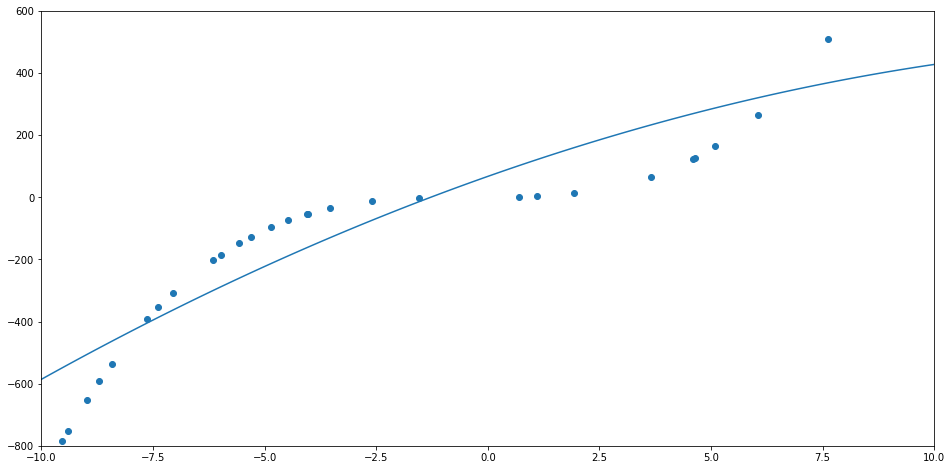

In [142]:
print(sum((a.T.dot(X_mat)-ys)**2))
fig, ax = plt.subplots(figsize=(16,8))
ax.set_xlim((-10, 10))
ax.set_ylim((-800, 600))
ax.scatter(xs,ys)
ax.plot(x,p2(x))

#### Task 11
Repeat the process for m=3,…,10. What do you observe?

In [143]:
def p(x,a):
    return (a[0] + a[1]*x + a[2]*x**2 + a[3]*x**3)

In [144]:
X_arrays = psi(xs,3)
row1 = pd.Series(X_arrays[0])
row2 = pd.Series(X_arrays[1])
row3 = pd.Series(X_arrays[2])
row4 = pd.Series(X_arrays[3])

In [145]:
X_mat = pd.concat([row1, row2, row3, row4], axis = 1).T
X_mat

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,-6.154420,-4.467029,-5.314930,-2.595550,-8.425230,-1.536680,8.767349,7.627351,8.191831,-3.525102,...,-8.700345,-5.987995,-7.378581,3.647407,-9.533133,4.600138,-5.575215,-4.035224,-7.627414,4.643912
2,37.876887,19.954349,28.248483,6.736881,70.984507,2.361386,76.866404,58.176486,67.106100,12.426344,...,75.696008,35.856079,54.443463,13.303580,90.880620,21.161269,31.083020,16.283030,58.177440,21.565923
3,-233.110278,-89.136658,-150.138718,-17.485912,-598.060830,-3.628696,673.914574,443.732490,549.721845,-43.804131,...,-658.581404,-214.706009,-401.715518,48.523575,-866.377008,97.344755,-173.294510,-65.705669,-443.743406,100.150258


In [146]:
a = np.linalg.pinv(X_mat.dot(X_mat.T)).dot(X_mat.dot(ys))
a

array([8.03197509e-11, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

6.234509139965975e-20


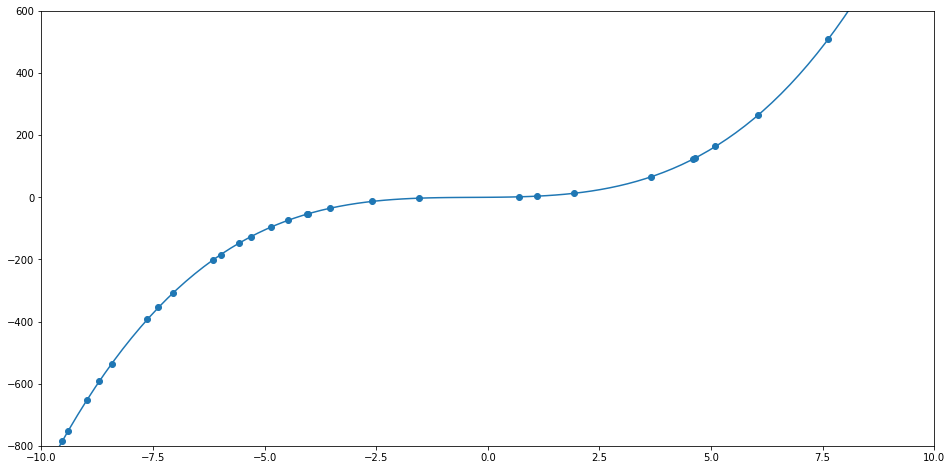

In [147]:
print(sum((a.T.dot(X_mat)-ys)**2))
fig, ax = plt.subplots(figsize=(16,8))
ax.set_xlim((-10, 10))
ax.set_ylim((-800, 600))
ax.scatter(xs,ys)
ax.plot(x,p(x,a))

#### Task 12
Plot the value of the loss (defined as $ l(\alpha^Tx, y) = \sum(\alpha^Tx - y)^2 $  ) for m=2,…,10. y is our `ys` from the Task 6. What do you observe? Could you tell the optimal m from the plot?

In [157]:
def p4(x,a):
    return (a[0] + a[1]*x + a[2]*x**2 + a[3]*x**3 + a[4]*x**4)

In [158]:
X_arrays = psi(xs,4)
row1 = pd.Series(X_arrays[0])
row2 = pd.Series(X_arrays[1])
row3 = pd.Series(X_arrays[2])
row4 = pd.Series(X_arrays[3])
row5 = pd.Series(X_arrays[4])

In [159]:
len(X_arrays)

5

In [160]:
X_mat = pd.concat([row1, row2, row3, row4, row5], axis = 1).T
X_mat

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,-6.154420,-4.467029,-5.314930,-2.595550,-8.425230,-1.536680,8.767349,7.627351,8.191831,-3.525102,...,-8.700345,-5.987995,-7.378581,3.647407,-9.533133,4.600138,-5.575215,-4.035224,-7.627414,4.643912
2,37.876887,19.954349,28.248483,6.736881,70.984507,2.361386,76.866404,58.176486,67.106100,12.426344,...,75.696008,35.856079,54.443463,13.303580,90.880620,21.161269,31.083020,16.283030,58.177440,21.565923
3,-233.110278,-89.136658,-150.138718,-17.485912,-598.060830,-3.628696,673.914574,443.732490,549.721845,-43.804131,...,-658.581404,-214.706009,-401.715518,48.523575,-866.377008,97.344755,-173.294510,-65.705669,-443.743406,100.150258
4,1434.658587,398.176044,797.976814,45.385561,5038.800293,5.576145,5908.444106,3384.503536,4503.228595,154.414031,...,5729.885603,1285.658420,2964.090623,176.985243,8259.287007,447.799297,966.154109,265.137074,3384.614542,465.089030


In [161]:
a = np.linalg.pinv(X_mat.dot(X_mat.T)).dot(X_mat.dot(ys))
a

array([-2.41925591e-10,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
       -1.24122934e-13])

3.011257669160467e-19


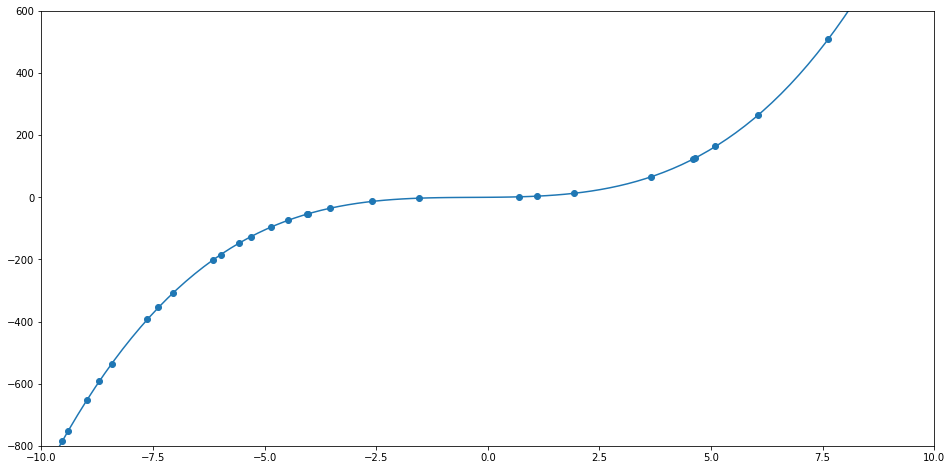

In [162]:
print(sum((a.T.dot(X_mat)-ys)**2))
fig, ax = plt.subplots(figsize=(16,8))
ax.set_xlim((-10, 10))
ax.set_ylim((-800, 600))
ax.scatter(xs,ys)
ax.plot(x,p4(x,a))